In [1]:
import iminuit
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
import numpy as np
import matplotlib.pylab as plt
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import corner
import sys
sys.path.insert(1, '/home/users/akatil/P-ONE/git/PONE_NuTau/Graphing/')
import plots
import Weights

In [2]:
NEvents = Weights.NEvents()

In [3]:
NEvents

(19969, 20031)

In [4]:
'''
Reading the output file
'''
timeDifferences_t = ([])
timeDifferences_e = ([])

ampRatio_t = ([])
ampRatio_e = ([])

widthRatio_t = ([])
widthRatio_e = ([])

skewnessRatio_t = ([])
skewnessRatio_e = ([])

LRR_t = ([])
LRR_e = ([])

event_number_t = ([])
event_number_e = ([])

largest_2DelLLH_t = ([])
largest_2DelLLH_e = ([])

weight_t = ([])
weight_e = ([])

weightPerEventTau = ([])
weightPerEventE = ([])

nFiles = 1000

event_num = 0
for i in range(0, 2000):
    print(i)
    readFile = dataio.I3File('/data/p-one/akatil/step_6_analysis/NuTau_NuE_20Events_expGauss_update6/step_6_'+str(i)+'_parameters.i3.gz')
    frame_num = 0
    for frame in readFile:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        params = frame['Parameters_doublePeak']
        params_single = frame['Parameters_biGauss']
        recoPulseMap = frame['I3RecoPulses']
        weightPerEvent = Weights.weight(frame, nFiles)
        #print(lepton)
        
        max2DelLLH = 0
        for omkey in params.keys():
            recoPulseList = recoPulseMap[omkey]
            recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
            recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
            vals = params[omkey]
            vals_single = params_single[omkey]
            
            tDiff = abs(vals[5]-vals[1])
            wRatio = abs(vals[2]-vals[6])
            aRatio = vals[4]/vals[8]
            lRatio = 2*abs(vals_single[0]-vals[0])
            skewRatio = abs(vals[3]-vals[7])
            weight = Weights.weight(frame, nFiles)
            
            if lRatio > max2DelLLH:
                max2DelLLH = lRatio
            
            if vals[0] != vals[0] or vals_single[0]!=vals_single[0]:
                print('Found a nan')
                print(vals_single[0], vals[0])
                
            if np.nan in vals or np.nan in vals_single:
                print('Found a nan')
                print(i, frame_num, omkey)
            
            if lepton.type == 15 or lepton.type == -15:
                timeDifferences_t = np.append(timeDifferences_t, tDiff)
                widthRatio_t = np.append(widthRatio_t, wRatio)
                #plots.plot_condition(tDiff>70, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey, lRatio)
                ampRatio_t = np.append(ampRatio_t, aRatio)
                LRR_t = np.append(LRR_t, lRatio)
                skewnessRatio_t = np.append(skewnessRatio_t, skewRatio)
                event_number_t = np.append(event_number_t, event_num)
                '''
                Calculating the weight of each event
                '''
                weight_t = np.append(weight_t, weight)
                print('Tau Weight: ', weight)
            else:
                timeDifferences_e = np.append(timeDifferences_e, tDiff)
                widthRatio_e = np.append(widthRatio_e, wRatio)
                #plots.plot_condition(np.log10(lRatio)>2, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey, lRatio)
                ampRatio_e = np.append(ampRatio_e, aRatio)
                LRR_e = np.append(LRR_e, lRatio)
                skewnessRatio_e = np.append(skewnessRatio_e, skewRatio)
                event_number_e = np.append(event_number_e, event_num)
                '''
                Calculating the weight of each event
                '''
                weight_e = np.append(weight_e, weight)
                print('E Weight: ', weight)
                
        '''
        Appending 2DelLLH and weight per event
        '''
                
        if lepton.type == 15 or lepton.type == -15:
            largest_2DelLLH_t = np.append(largest_2DelLLH_t, max2DelLLH)
            weightPerEventTau = np.append(weightPerEventTau, weightPerEvent)
        else:
            largest_2DelLLH_e = np.append(largest_2DelLLH_e, max2DelLLH)
            weightPerEventE = np.append(weightPerEventE, weightPerEvent)
            
        event_num = event_num+1
        frame_num = frame_num+1

0
1
2
('E Weight: ', 0.0011023659377171638)
('E Weight: ', 0.0011023659377171638)
('Tau Weight: ', 0.0009006322493702102)
('Tau Weight: ', 0.0009006322493702102)
3
4
('E Weight: ', 0.0007730149119681545)
('E Weight: ', 0.0007730149119681545)
5
('E Weight: ', 0.001231611260985007)
('E Weight: ', 0.001231611260985007)
('E Weight: ', 0.001231611260985007)
6
('Tau Weight: ', 0.0007924774203469574)
('Tau Weight: ', 0.0007924774203469574)
7
8
('E Weight: ', 0.001205217533842777)
('E Weight: ', 0.001205217533842777)
9
('Tau Weight: ', 0.001148849334669769)
10
('Tau Weight: ', 0.000295595006302743)
11
12
13
('E Weight: ', 0.0008233815038165311)
('E Weight: ', 0.0008233815038165311)
('E Weight: ', 0.0012207208399435713)
('E Weight: ', 0.0012207208399435713)
14
15
('E Weight: ', 0.0006452370708305871)
('E Weight: ', 0.0006452370708305871)
16
('E Weight: ', 0.00047181545481858703)
('E Weight: ', 0.0033563730801431844)
('E Weight: ', 0.0033563730801431844)
('E Weight: ', 0.0033563730801431844)
('E

108
109
110
111
('E Weight: ', 0.00184001868921268)
('E Weight: ', 0.00184001868921268)
('E Weight: ', 0.00184001868921268)
112
('E Weight: ', 0.0013266625799536684)
('E Weight: ', 0.0013266625799536684)
113
('E Weight: ', 0.0008838010293344016)
('E Weight: ', 0.0008838010293344016)
114
('E Weight: ', 0.0006276244914259942)
115
116
('E Weight: ', 0.006575646902005971)
('E Weight: ', 0.006575646902005971)
('Tau Weight: ', 0.0026799754610563158)
117
('E Weight: ', 0.0010618194677235269)
118
('Tau Weight: ', 0.0010438754812007076)
('Tau Weight: ', 0.0010438754812007076)
('Tau Weight: ', 0.0004538747056213098)
119
120
121
('Tau Weight: ', 0.0017668637329721888)
('Tau Weight: ', 0.0017668637329721888)
('Tau Weight: ', 0.0017668637329721888)
('Tau Weight: ', 0.0017668637329721888)
('Tau Weight: ', 0.0017668637329721888)
('Tau Weight: ', 0.0017668637329721888)
('Tau Weight: ', 0.0004201106932951292)
('E Weight: ', 0.0022876027873929947)
('E Weight: ', 0.0022876027873929947)
('E Weight: ', 0.0

('E Weight: ', 0.0012949137049115258)
('E Weight: ', 0.0012949137049115258)
('E Weight: ', 0.0012949137049115258)
('E Weight: ', 0.0005678467562156965)
227
('Tau Weight: ', 0.000958189839610139)
('Tau Weight: ', 0.000958189839610139)
('Tau Weight: ', 0.000958189839610139)
('Tau Weight: ', 0.000958189839610139)
('E Weight: ', 0.0005580771842688596)
228
229
230
('E Weight: ', 0.0008506941097458046)
('E Weight: ', 0.0008506941097458046)
231
232
233
234
('E Weight: ', 0.0007796806654908277)
('E Weight: ', 0.0007796806654908277)
235
('Tau Weight: ', 0.0002705307577593653)
236
('E Weight: ', 0.0025076356061391344)
('E Weight: ', 0.0025076356061391344)
237
238
('Tau Weight: ', 0.00043311720416560294)
239
('Tau Weight: ', 0.0003421776593901862)
('Tau Weight: ', 0.0003421776593901862)
('E Weight: ', 0.0005387358109334312)
240
('E Weight: ', 0.0014669018874226938)
241
242
243
244
('Tau Weight: ', 0.0007152552294385723)
245
('E Weight: ', 0.0006757491436398844)
('Tau Weight: ', 0.0008444234308064

('E Weight: ', 0.005283555214429214)
('E Weight: ', 0.005283555214429214)
('E Weight: ', 0.005283555214429214)
('E Weight: ', 0.005283555214429214)
('E Weight: ', 0.005283555214429214)
('E Weight: ', 0.005283555214429214)
('Tau Weight: ', 0.0019509486006677958)
('Tau Weight: ', 0.0019509486006677958)
('Tau Weight: ', 0.0019509486006677958)
('Tau Weight: ', 0.0019509486006677958)
('Tau Weight: ', 0.0019509486006677958)
('Tau Weight: ', 0.0019509486006677958)
('Tau Weight: ', 0.0019509486006677958)
352
353
('E Weight: ', 0.0012748592452244687)
354
('Tau Weight: ', 0.0007033095623653532)
('E Weight: ', 0.000957336648746829)
('E Weight: ', 0.000957336648746829)
355
('E Weight: ', 0.0004565291933228975)
('Tau Weight: ', 0.00043779080388235377)
('Tau Weight: ', 0.00043779080388235377)
356
357
('E Weight: ', 0.0010347603780068578)
('E Weight: ', 0.0010347603780068578)
('E Weight: ', 0.0010347603780068578)
('E Weight: ', 0.0010347603780068578)
('E Weight: ', 0.0003649939399895243)
('E Weight: 

451
452
('E Weight: ', 0.0007271070786988965)
('E Weight: ', 0.0007271070786988965)
('Tau Weight: ', 0.000975166119749372)
453
('E Weight: ', 0.0004446844890549535)
('Tau Weight: ', 0.0003370282238070461)
('E Weight: ', 0.0020950048584487567)
('E Weight: ', 0.0020950048584487567)
454
('Tau Weight: ', 0.0003466526900698322)
455
('Tau Weight: ', 0.001693104924806054)
456
457
('Tau Weight: ', 0.0009830432007725436)
458
('Tau Weight: ', 0.0012237955646406092)
('Tau Weight: ', 0.0012237955646406092)
459
('Tau Weight: ', 0.0005202866677099438)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)
('E Weight: ', 0.0024231642185182233)


('Tau Weight: ', 0.0010046115452731555)
560
561
562
('Tau Weight: ', 0.0007506906134644749)
('Tau Weight: ', 0.0007506906134644749)
563
('E Weight: ', 0.0005445694723927293)
564
('Tau Weight: ', 0.0013520527599026923)
('Tau Weight: ', 0.0013520527599026923)
('Tau Weight: ', 0.0014150309630871914)
565
('Tau Weight: ', 0.0004667808879134079)
('Tau Weight: ', 0.0004667808879134079)
566
('E Weight: ', 0.0010634806056741487)
('Tau Weight: ', 0.0006725399690316447)
567
568
('Tau Weight: ', 0.0008346048815979566)
('Tau Weight: ', 0.0008346048815979566)
('E Weight: ', 0.000440925909173277)
569
570
('E Weight: ', 0.0011873595823125456)
('E Weight: ', 0.0011873595823125456)
571
572
('E Weight: ', 0.0008844180747776043)
573
574
575
576
577
578
579
('E Weight: ', 0.0007033026827176747)
580
581
582
('E Weight: ', 0.0012222180413091665)
583
584
('E Weight: ', 0.0007289377296499761)
585
('Tau Weight: ', 0.0007080849544762919)
('Tau Weight: ', 0.0007080849544762919)
('E Weight: ', 0.002082809233061756

('E Weight: ', 0.0014572306240397772)
('E Weight: ', 0.0014572306240397772)
682
683
684
('Tau Weight: ', 0.0005493658343831127)
('Tau Weight: ', 0.0028160339771527336)
685
('Tau Weight: ', 0.0010875002144928748)
('Tau Weight: ', 0.0010875002144928748)
686
('Tau Weight: ', 0.0009325522941117533)
('Tau Weight: ', 0.0009325522941117533)
('Tau Weight: ', 0.0008348229964852829)
('Tau Weight: ', 0.0008348229964852829)
('Tau Weight: ', 0.0008348229964852829)
687
('E Weight: ', 0.0027376897216977564)
('E Weight: ', 0.0027376897216977564)
688
689
('E Weight: ', 0.0012894963835061745)
('E Weight: ', 0.0002648480304410267)
('E Weight: ', 0.0002648480304410267)
('Tau Weight: ', 0.0013234176379649963)
('Tau Weight: ', 0.0013234176379649963)
690
('E Weight: ', 0.0006522825541698319)
('E Weight: ', 0.0006522825541698319)
691
692
('E Weight: ', 0.000857346071884217)
693
('E Weight: ', 0.0017032981670133552)
694
695
('E Weight: ', 0.0006695773417486448)
('E Weight: ', 0.0013068083960066223)
('E Weight:

811
('Tau Weight: ', 0.0007532333332239394)
('Tau Weight: ', 0.0008541704406525454)
812
813
814
('Tau Weight: ', 0.0019890624396401856)
('Tau Weight: ', 0.0019890624396401856)
('E Weight: ', 0.002428506220287117)
815
816
817
818
('Tau Weight: ', 0.0010207036786150853)
819
('Tau Weight: ', 0.0003825884391523396)
('E Weight: ', 0.0016869551070077253)
('E Weight: ', 0.0016869551070077253)
('Tau Weight: ', 0.004156729955814034)
('Tau Weight: ', 0.004156729955814034)
('Tau Weight: ', 0.004156729955814034)
('Tau Weight: ', 0.004156729955814034)
820
('Tau Weight: ', 0.0007438369898375094)
('Tau Weight: ', 0.0009771062569268385)
821
822
('Tau Weight: ', 0.0011085590826612813)
('Tau Weight: ', 0.0011085590826612813)
('Tau Weight: ', 0.0008747235650197633)
('E Weight: ', 0.0003910150162561313)
('E Weight: ', 0.0003910150162561313)
('E Weight: ', 0.0003910150162561313)
823
('E Weight: ', 0.00238759932286803)
('E Weight: ', 0.00238759932286803)
('E Weight: ', 0.00238759932286803)
('E Weight: ', 0.

('E Weight: ', 0.000994824557408065)
915
916
('Tau Weight: ', 0.0005012068193183738)
('Tau Weight: ', 0.0005012068193183738)
917
('E Weight: ', 0.001015843929847528)
('E Weight: ', 0.001015843929847528)
918
('E Weight: ', 0.0015569328952189949)
('E Weight: ', 0.0015569328952189949)
('E Weight: ', 0.0015569328952189949)
('E Weight: ', 0.0015569328952189949)
('Tau Weight: ', 0.0003485756571062745)
('E Weight: ', 0.00026496632539872917)
919
920
('E Weight: ', 0.0017667750154204765)
('E Weight: ', 0.0017667750154204765)
921
('Tau Weight: ', 0.0007401806301458942)
('Tau Weight: ', 0.0007401806301458942)
('E Weight: ', 0.0011036742633320272)
('Tau Weight: ', 0.0005695787060565256)
922
923
('E Weight: ', 0.0008765832254436482)
('E Weight: ', 0.0008765832254436482)
924
925
('Tau Weight: ', 0.00045790058117340006)
('Tau Weight: ', 0.0003469622198309817)
('Tau Weight: ', 0.0003469622198309817)
('E Weight: ', 0.0011765559178601379)
926
('E Weight: ', 0.0012046180702408628)
927
928
('Tau Weight: '

1048
1049
('E Weight: ', 0.0008724182561519422)
('E Weight: ', 0.0004993961316326789)
1050
('E Weight: ', 0.0005881176651266392)
('E Weight: ', 0.0005881176651266392)
1051
1052
('Tau Weight: ', 0.0008457896649252078)
('Tau Weight: ', 0.0019494312991886395)
('Tau Weight: ', 0.0019494312991886395)
1053
1054
('E Weight: ', 0.0005257736864312999)
1055
1056
1057
1058
1059
('E Weight: ', 0.0010227138809644754)
('Tau Weight: ', 0.0004712310751443925)
1060
('E Weight: ', 0.0009262396830711695)
('Tau Weight: ', 0.00136624538731086)
1061
1062
1063
('E Weight: ', 0.0006113824596327479)
1064
('Tau Weight: ', 0.0005803121610554899)
('Tau Weight: ', 0.0005803121610554899)
('Tau Weight: ', 0.0005803121610554899)
1065
1066
('E Weight: ', 0.0004995602252701554)
('E Weight: ', 0.0016781596807776524)
1067
1068
('E Weight: ', 0.0008253015632990351)
1069
1070
('E Weight: ', 0.0005214326198527354)
1071
('Tau Weight: ', 0.001712183169978037)
('Tau Weight: ', 0.001712183169978037)
1072
('E Weight: ', 0.001669

('E Weight: ', 0.0044327023920564725)
('E Weight: ', 0.0044327023920564725)
('E Weight: ', 0.0044327023920564725)
1154
('E Weight: ', 0.003226734413547249)
('E Weight: ', 0.003226734413547249)
('E Weight: ', 0.003226734413547249)
1155
('E Weight: ', 0.001248014948566971)
1156
('E Weight: ', 0.001661547001449784)
('E Weight: ', 0.003239038993463479)
('E Weight: ', 0.003239038993463479)
1157
('Tau Weight: ', 0.0022237173684599844)
('Tau Weight: ', 0.0022237173684599844)
('Tau Weight: ', 0.0022237173684599844)
('Tau Weight: ', 0.0022237173684599844)
1158
1159
1160
('E Weight: ', 0.0021754815062618137)
('E Weight: ', 0.0021754815062618137)
('E Weight: ', 0.0021754815062618137)
('E Weight: ', 0.0021754815062618137)
1161
('Tau Weight: ', 0.002208375121760171)
1162
1163
('E Weight: ', 0.0023615937054037657)
('E Weight: ', 0.0010419226565976415)
('E Weight: ', 0.0010419226565976415)
1164
1165
('E Weight: ', 0.0015783618101869444)
('E Weight: ', 0.0015783618101869444)
('E Weight: ', 0.001578361

('Tau Weight: ', 0.0022186734127808585)
('Tau Weight: ', 0.0022186734127808585)
1260
('E Weight: ', 0.0005862132900043086)
1261
1262
('Tau Weight: ', 0.00032088779772280514)
('Tau Weight: ', 0.00032088779772280514)
1263
('E Weight: ', 0.001142252264211014)
('E Weight: ', 0.001142252264211014)
('Tau Weight: ', 0.00050033004906976)
('Tau Weight: ', 0.00050033004906976)
1264
1265
('E Weight: ', 0.004525385493522497)
('E Weight: ', 0.004525385493522497)
1266
('Tau Weight: ', 0.0004654125965852894)
('Tau Weight: ', 0.0004654125965852894)
1267
1268
('E Weight: ', 0.0009584904730782858)
1269
1270
('E Weight: ', 0.0021108343945704573)
('E Weight: ', 0.0021108343945704573)
('E Weight: ', 0.0021108343945704573)
('E Weight: ', 0.0021108343945704573)
('E Weight: ', 0.0021108343945704573)
('E Weight: ', 0.0021108343945704573)
('E Weight: ', 0.0021108343945704573)
1271
('E Weight: ', 0.0008467120092603626)
('E Weight: ', 0.0009601944451327672)
('E Weight: ', 0.0009601944451327672)
1272
1273
1274
('E

('E Weight: ', 0.0014245056213351354)
1379
('Tau Weight: ', 0.0007220491013912126)
1380
1381
('Tau Weight: ', 0.0010955395583646995)
1382
1383
('E Weight: ', 0.0005549731065276897)
('E Weight: ', 0.0005549731065276897)
('E Weight: ', 0.0006506252249734032)
('E Weight: ', 0.0006506252249734032)
1384
('E Weight: ', 0.0003314739027151552)
('E Weight: ', 0.0003314739027151552)
('E Weight: ', 0.0005380807413125619)
('E Weight: ', 0.0005380807413125619)
('E Weight: ', 0.0009327028117941705)
('Tau Weight: ', 0.0011531369366825713)
('Tau Weight: ', 0.0011531369366825713)
('Tau Weight: ', 0.0011531369366825713)
1385
('E Weight: ', 0.0009447863211301207)
('E Weight: ', 0.0009447863211301207)
('E Weight: ', 0.0009447863211301207)
('Tau Weight: ', 0.00032414391546597683)
('E Weight: ', 0.0005815121154418447)
1386
1387
('Tau Weight: ', 0.0003007737093202592)
('Tau Weight: ', 0.0004880371405954898)
1388
1389
('Tau Weight: ', 0.0010634715002714298)
('E Weight: ', 0.0008301043377326583)
('E Weight: ',

1482
1483
1484
1485
('E Weight: ', 0.000594339243217032)
('E Weight: ', 0.0007337999008273416)
1486
('E Weight: ', 0.0010610884598595241)
1487
('Tau Weight: ', 0.0009646862074023531)
1488
('Tau Weight: ', 0.0007887780003298233)
1489
1490
1491
1492
('Tau Weight: ', 0.0007910145417784829)
('E Weight: ', 0.0013229173521516688)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
('E Weight: ', 0.003926651236908563)
1493
('E Weight: ', 0.0020857683736391864)
('E Weight: ', 0.0020857683736391864)
('E Weight: ', 0.0020857683736391864)
1494
1495
('E Weight: ', 0.0018582039639291762)
('E Weight: ', 0.0022529777765977325)
('E Weight: ', 0.0022529777765977325)
('E Weight: ', 0.0022529

1587
('E Weight: ', 0.0007587772950939798)
('E Weight: ', 0.0007587772950939798)
('E Weight: ', 0.0007587772950939798)
('E Weight: ', 0.0013121970876993838)
('E Weight: ', 0.0013121970876993838)
('E Weight: ', 0.0004642689202246304)
1588
('Tau Weight: ', 0.0009182294660548836)
('E Weight: ', 0.003883936520526505)
('E Weight: ', 0.003883936520526505)
('E Weight: ', 0.003883936520526505)
1589
('Tau Weight: ', 0.0010625961448216014)
('Tau Weight: ', 0.0010625961448216014)
1590
('E Weight: ', 0.0018796362133574772)
('E Weight: ', 0.0018796362133574772)
('E Weight: ', 0.0018796362133574772)
('E Weight: ', 0.0018796362133574772)
('E Weight: ', 0.0018796362133574772)
1591
1592
('E Weight: ', 0.000510846168836727)
1593
('E Weight: ', 0.002982062655354096)
('E Weight: ', 0.002982062655354096)
('E Weight: ', 0.002982062655354096)
('E Weight: ', 0.002982062655354096)
('E Weight: ', 0.002982062655354096)
('E Weight: ', 0.001263423055742841)
('E Weight: ', 0.001263423055742841)
1594
1595
1596
('E W

1705
1706
('E Weight: ', 0.0026608741422369784)
('E Weight: ', 0.0026608741422369784)
('E Weight: ', 0.0026608741422369784)
1707
1708
('E Weight: ', 0.0010827206661917063)
('E Weight: ', 0.0010827206661917063)
('E Weight: ', 0.0010827206661917063)
1709
('E Weight: ', 0.0016196888519447604)
1710
('E Weight: ', 0.00043496076980960335)
1711
1712
1713
1714
('Tau Weight: ', 0.0012868115616713294)
('Tau Weight: ', 0.0012868115616713294)
('Tau Weight: ', 0.0012868115616713294)
('Tau Weight: ', 0.0012868115616713294)
1715
1716
('Tau Weight: ', 0.0023111628337328747)
('Tau Weight: ', 0.0023111628337328747)
('Tau Weight: ', 0.0023111628337328747)
1717
1718
('Tau Weight: ', 0.00219740734115195)
1719
('Tau Weight: ', 0.00031558204806393913)
1720
1721
('E Weight: ', 0.0009262705229315895)
('E Weight: ', 0.0009262705229315895)
1722
1723
('Tau Weight: ', 0.0003437255296461337)
('Tau Weight: ', 0.00041460062753392234)
('Tau Weight: ', 0.00041460062753392234)
1724
1725
('Tau Weight: ', 0.00107689703441

('E Weight: ', 0.0006129949165195541)
1819
1820
('E Weight: ', 0.0004896185468127648)
('E Weight: ', 0.0004896185468127648)
('E Weight: ', 0.0004896185468127648)
1821
('E Weight: ', 0.0047014596528323245)
('E Weight: ', 0.0047014596528323245)
('E Weight: ', 0.0047014596528323245)
('E Weight: ', 0.0047014596528323245)
('E Weight: ', 0.00630942474776449)
1822
('E Weight: ', 0.0012513918958877931)
('E Weight: ', 0.00354796783851118)
('E Weight: ', 0.00354796783851118)
('E Weight: ', 0.00354796783851118)
1823
('Tau Weight: ', 0.0024788707531165077)
1824
('E Weight: ', 0.0018862215561823625)
('E Weight: ', 0.0018862215561823625)
('E Weight: ', 0.0018862215561823625)
('E Weight: ', 0.0018862215561823625)
1825
('E Weight: ', 0.0004970530048589231)
1826
('Tau Weight: ', 0.0005693675249600985)
('Tau Weight: ', 0.0005693675249600985)
('E Weight: ', 0.0007090133276289754)
('E Weight: ', 0.0007090133276289754)
1827
1828
1829
('Tau Weight: ', 0.0017328684213885556)
('Tau Weight: ', 0.00173286842138

1923
('Tau Weight: ', 0.00038283009309902905)
('Tau Weight: ', 0.000811343657104244)
('Tau Weight: ', 0.000811343657104244)
('E Weight: ', 0.0033092608343093673)
1924
('E Weight: ', 0.001240356850500659)
1925
('E Weight: ', 0.001392888611277522)
('E Weight: ', 0.001392888611277522)
('E Weight: ', 0.001392888611277522)
('E Weight: ', 0.00033718442985093683)
('E Weight: ', 0.00033718442985093683)
('E Weight: ', 0.00033718442985093683)
('Tau Weight: ', 0.000794249029369678)
('Tau Weight: ', 0.000794249029369678)
('Tau Weight: ', 0.000794249029369678)
1926
1927
1928
('Tau Weight: ', 0.0007725054033631027)
1929
('Tau Weight: ', 0.0008509534227440888)
1930
('E Weight: ', 0.003520031143354528)
('E Weight: ', 0.003520031143354528)
1931
('Tau Weight: ', 0.0007846994357059089)
1932
('Tau Weight: ', 0.002268854822435836)
('Tau Weight: ', 0.002268854822435836)
('Tau Weight: ', 0.002268854822435836)
('Tau Weight: ', 0.002268854822435836)
('Tau Weight: ', 0.002268854822435836)
('Tau Weight: ', 0.002

Will plot some pretty plots using corner and matplotlib.pyplot
(1444, 1444, 1444, 1444, 1444)
(2150, 2150, 2150, 2150, 2150)


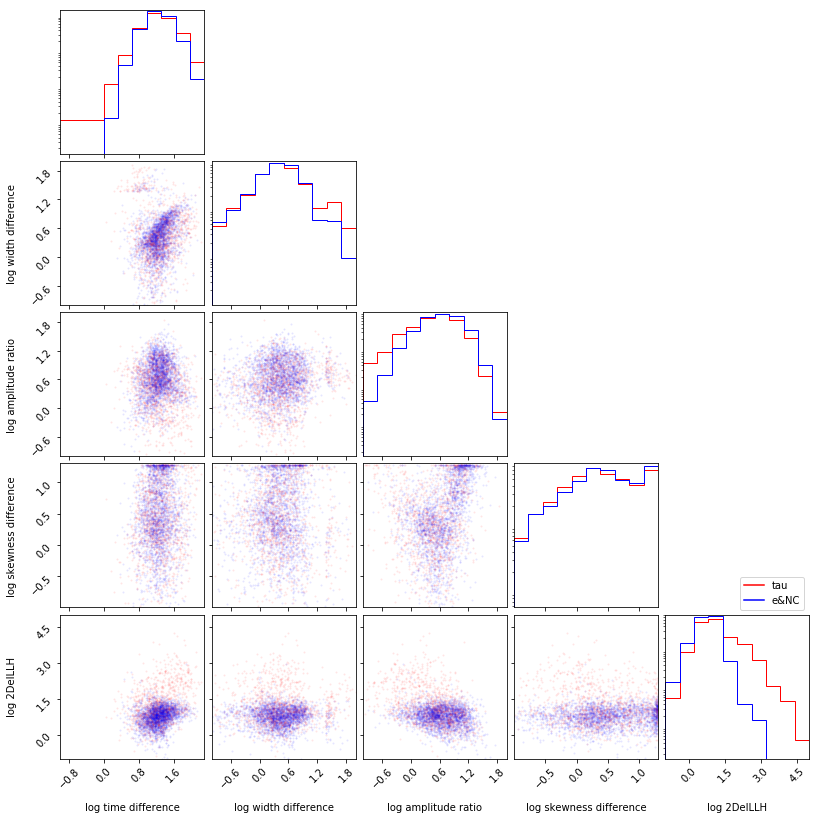

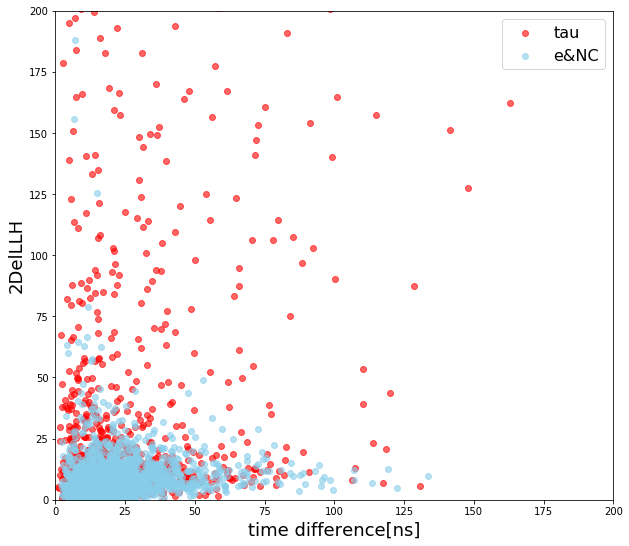

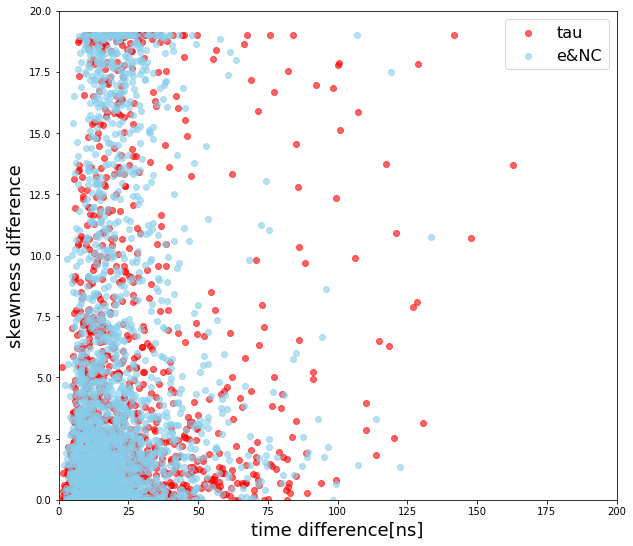

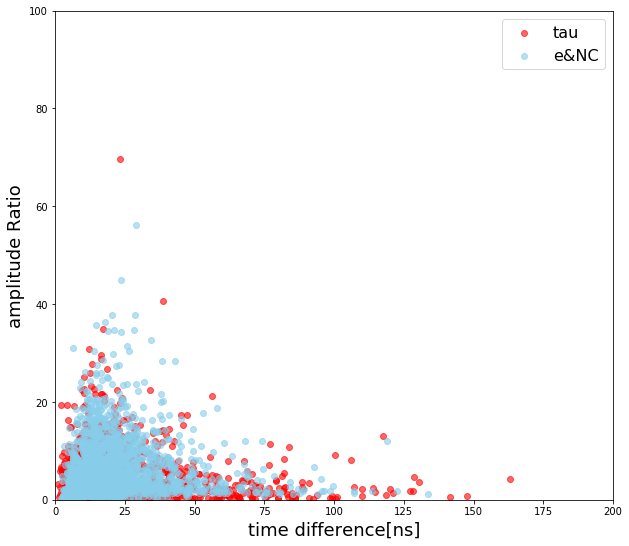

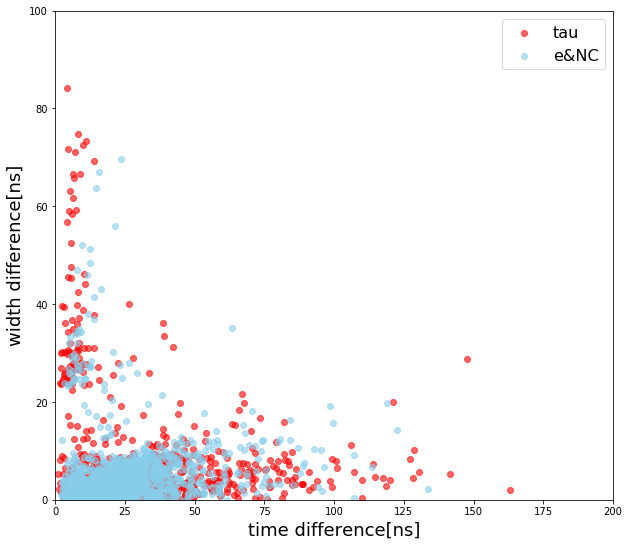

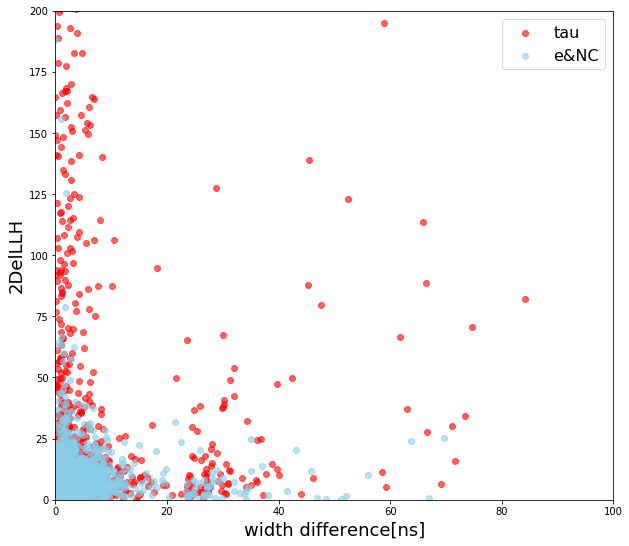

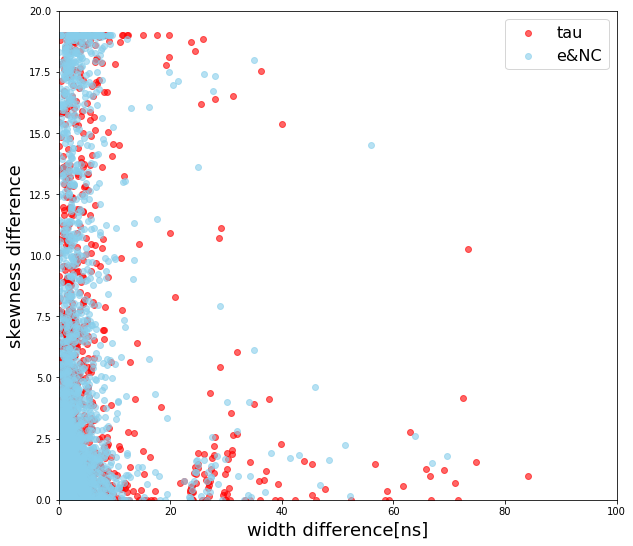

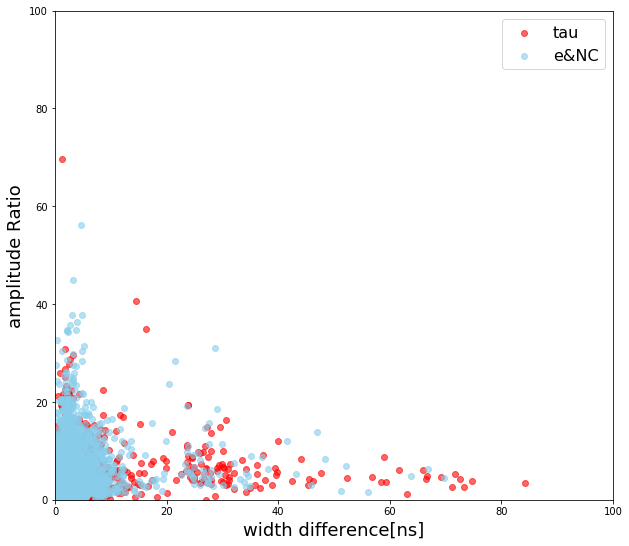

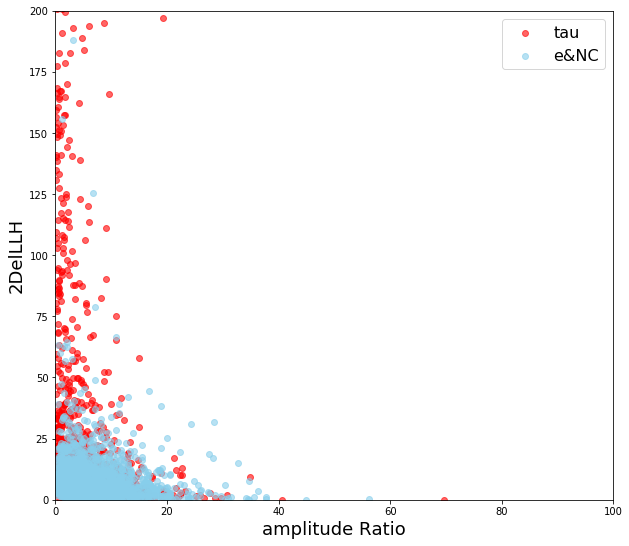

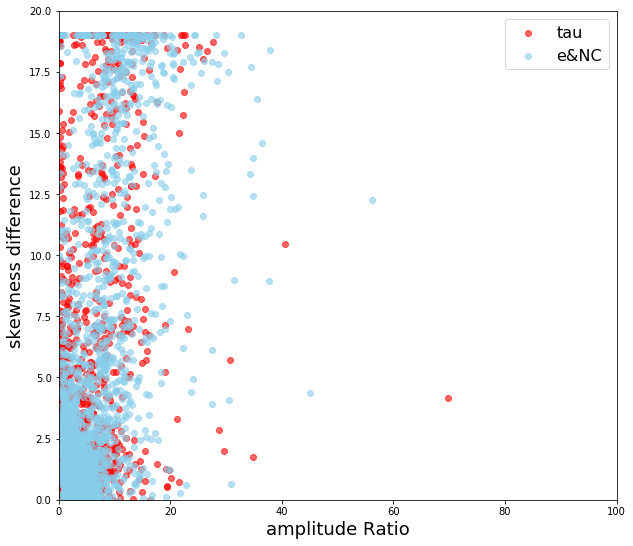

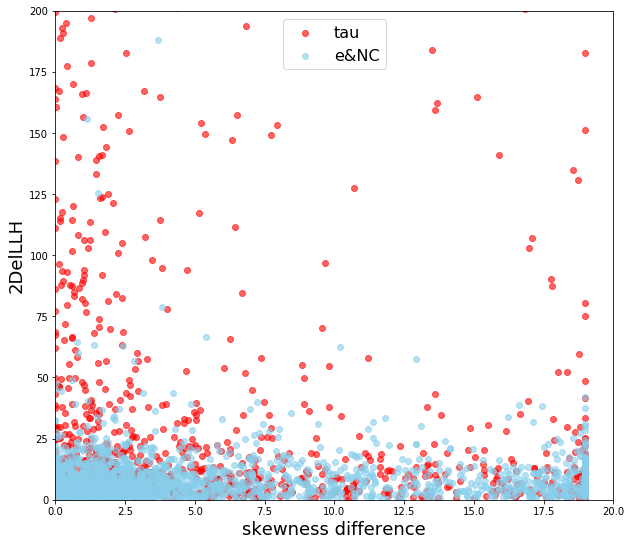

In [5]:
p = plots.plots

params = [timeDifferences_t, widthRatio_t, skewnessRatio_t, ampRatio_t, LRR_t, 
          timeDifferences_e, widthRatio_e, skewnessRatio_e, ampRatio_e, LRR_e]

p = plots.plots(params)

p.corner(log_all=True, range_time=[1e-1, 2e2], range_amp=[1e-1, 1e2], range_skew=[1e-1, 20], range_LLH=[1e-1, 1e5], range_wid=[1e-1, 1e2],
        numBins_time=10, numBins_amp=10,numBins_LLH=10)
p.scatter(log_all=False, range_time=[1e-9, 2e2], range_amp=[1e-9, 1e2], range_skew=[1e-9, 20], range_LLH=[1e-9, 200], range_wid=[1e-9, 1e2])

([0.1, 200.0], [0.1, 100.0], [0.1, 20], [0.1, 100.0], [0.1, 100000.0])
((20,), (50,), (50,), (50,), (20,))
((1444,), (1444,))


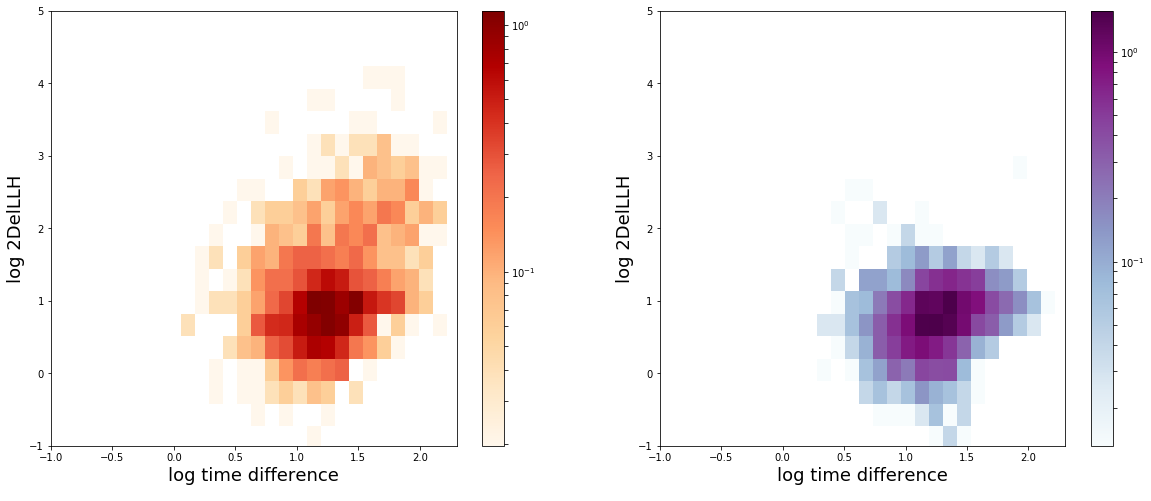

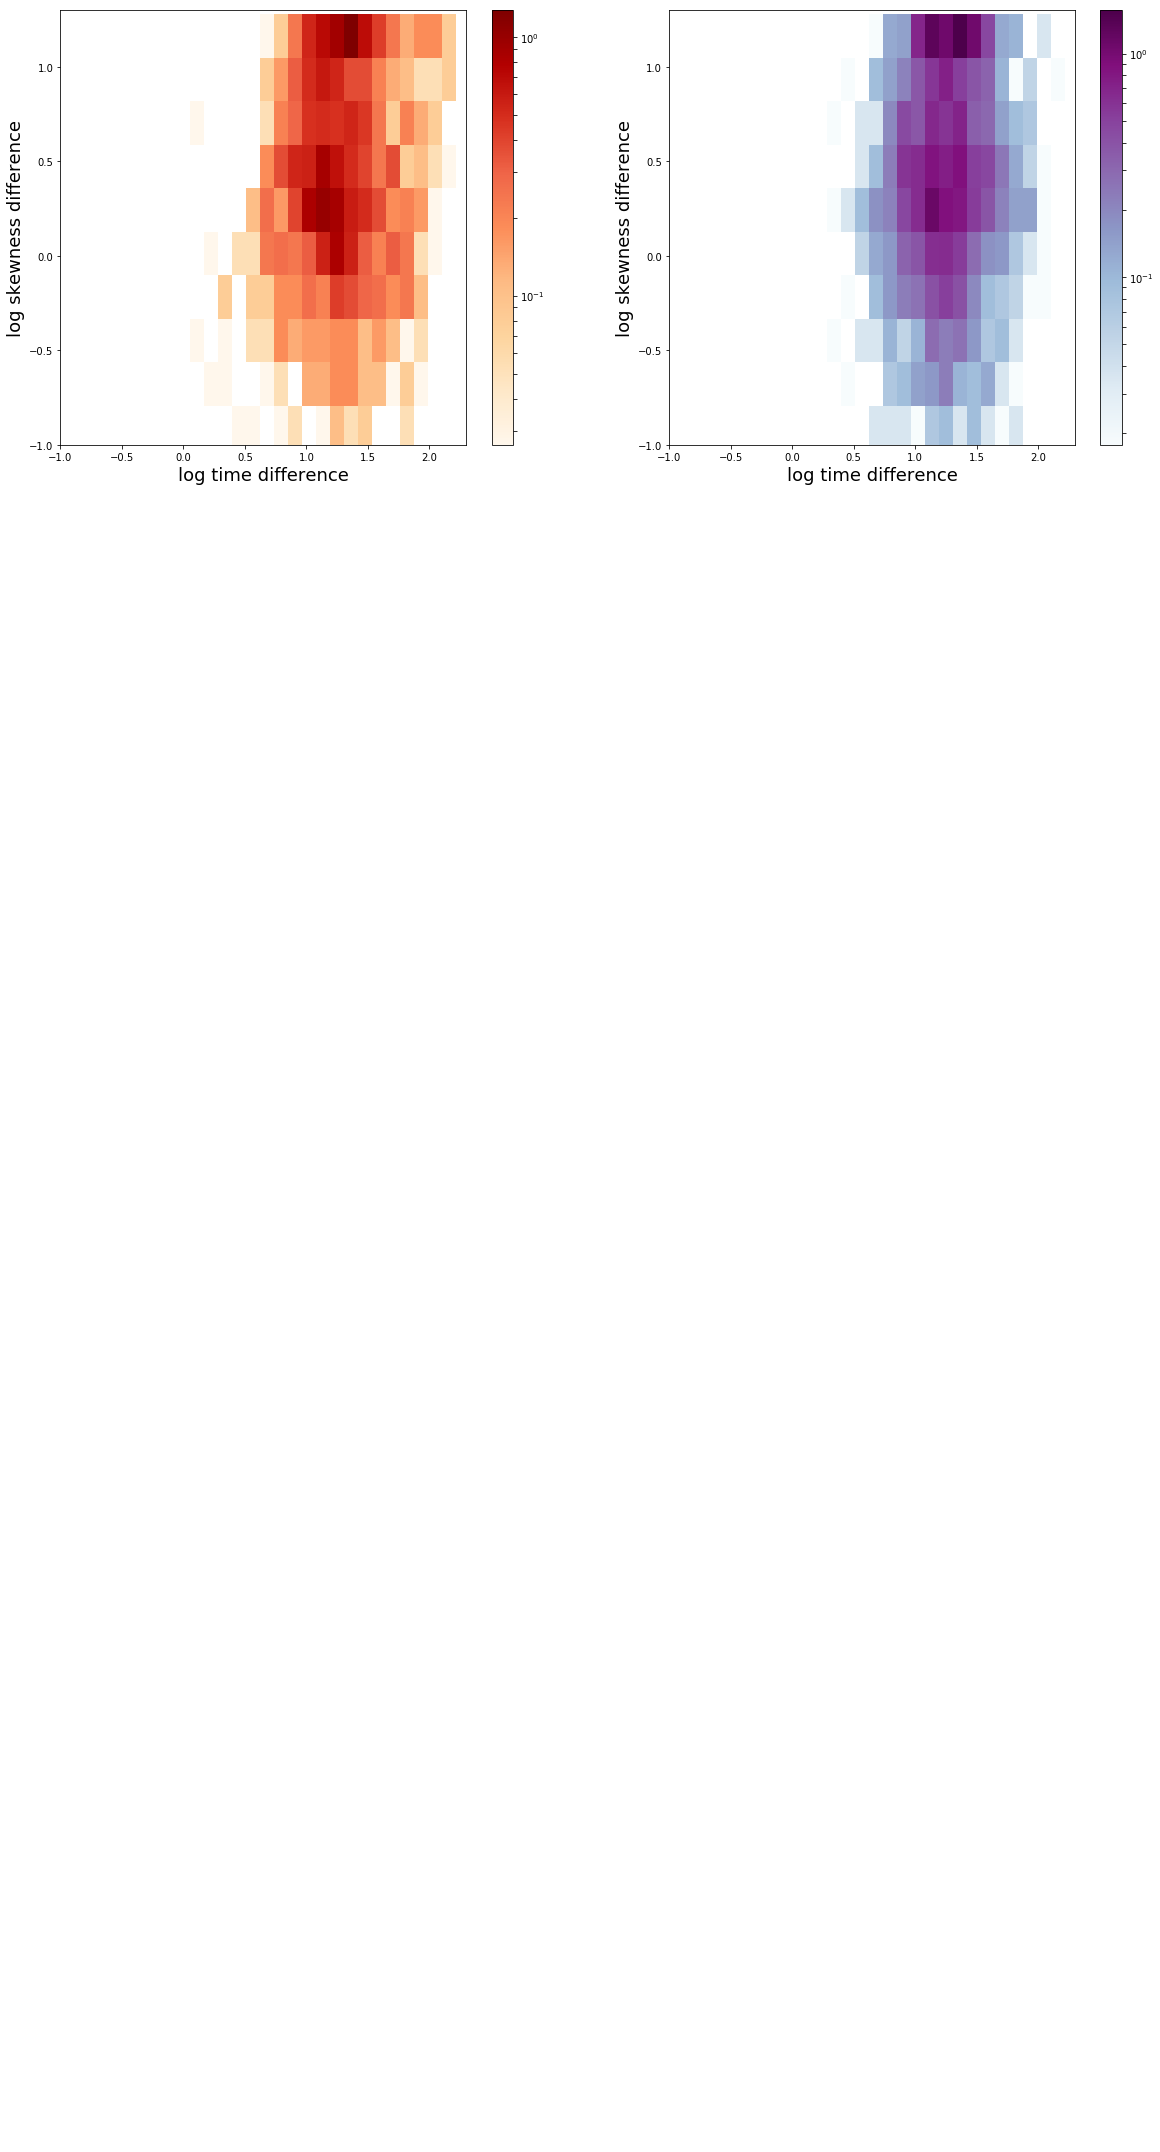

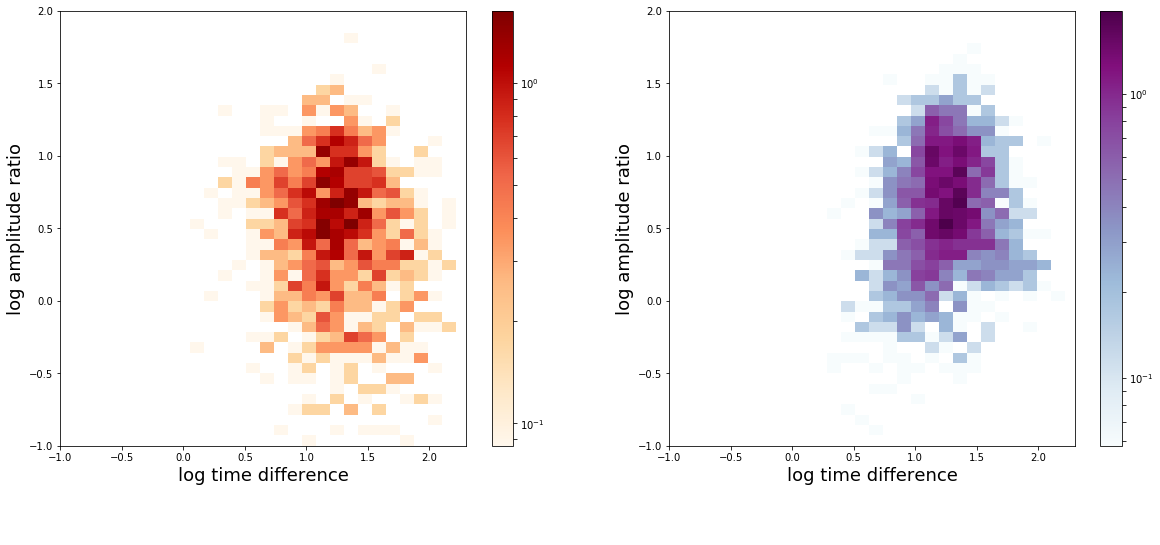

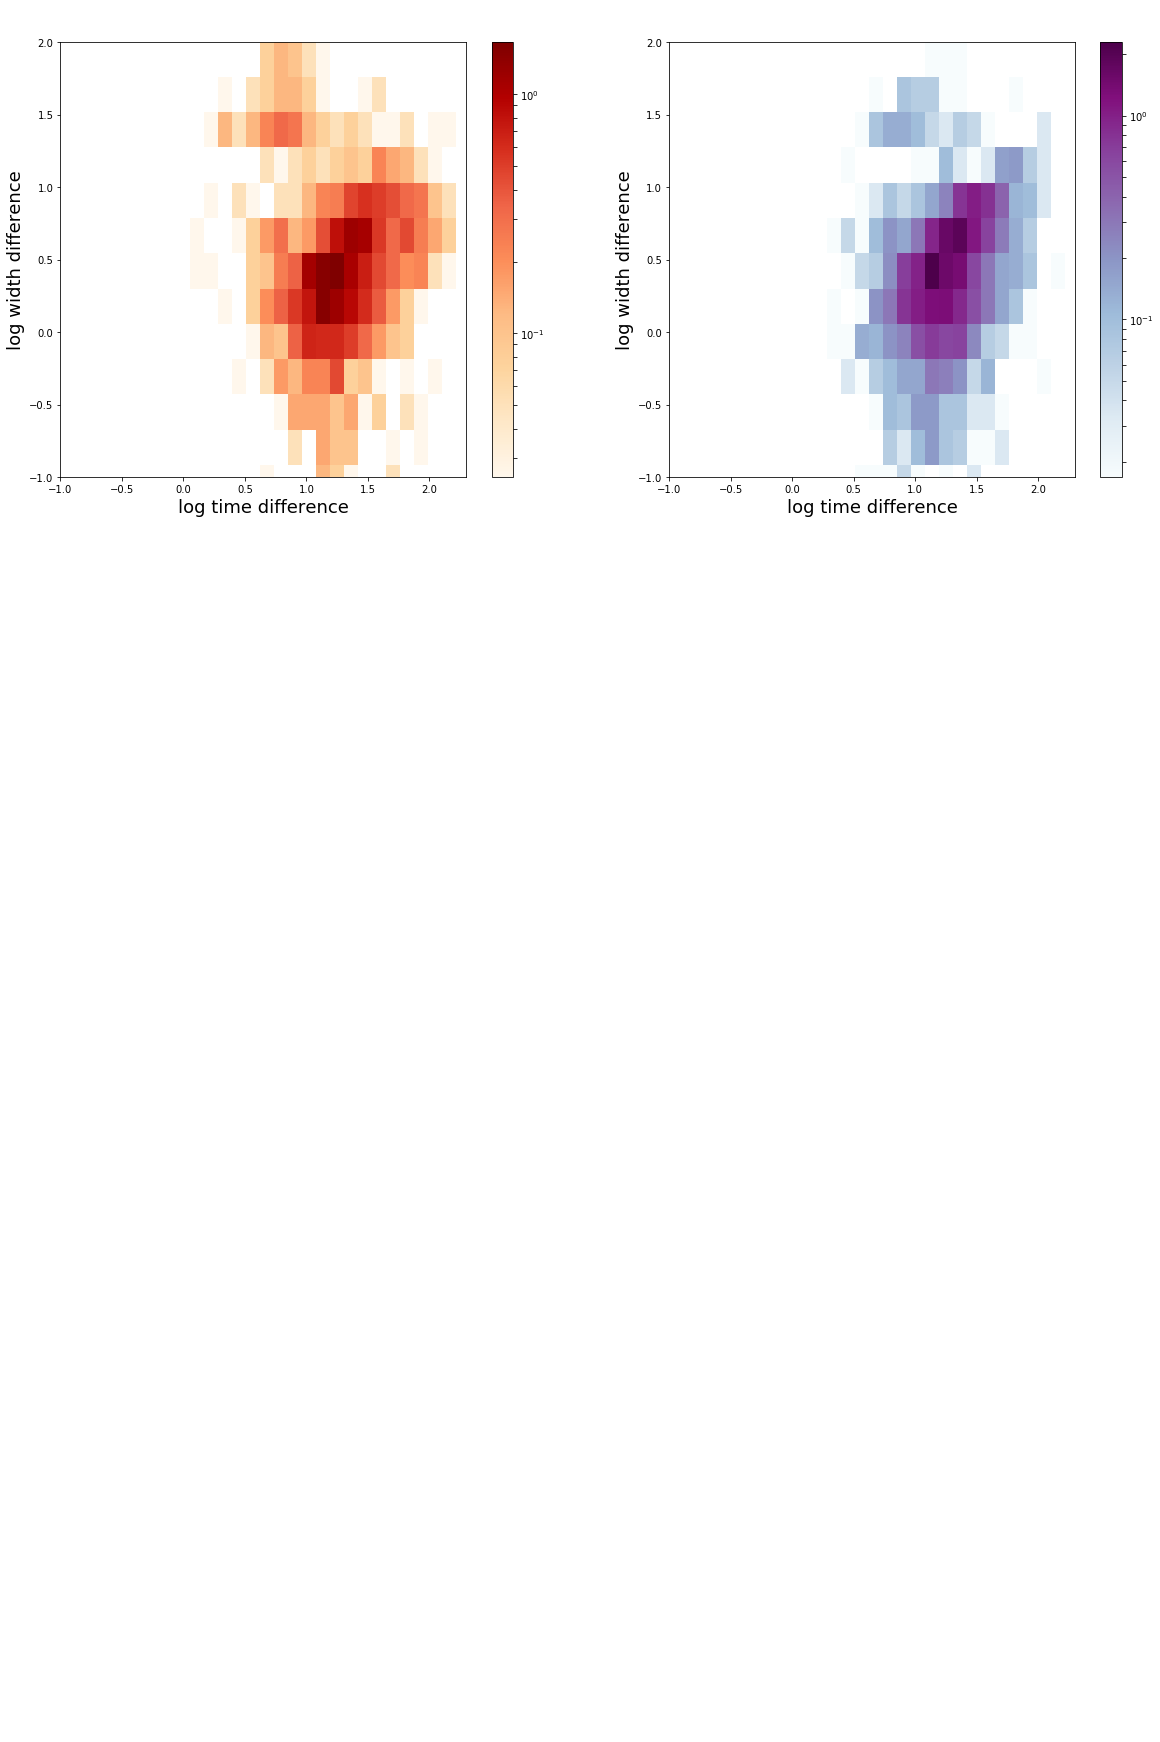

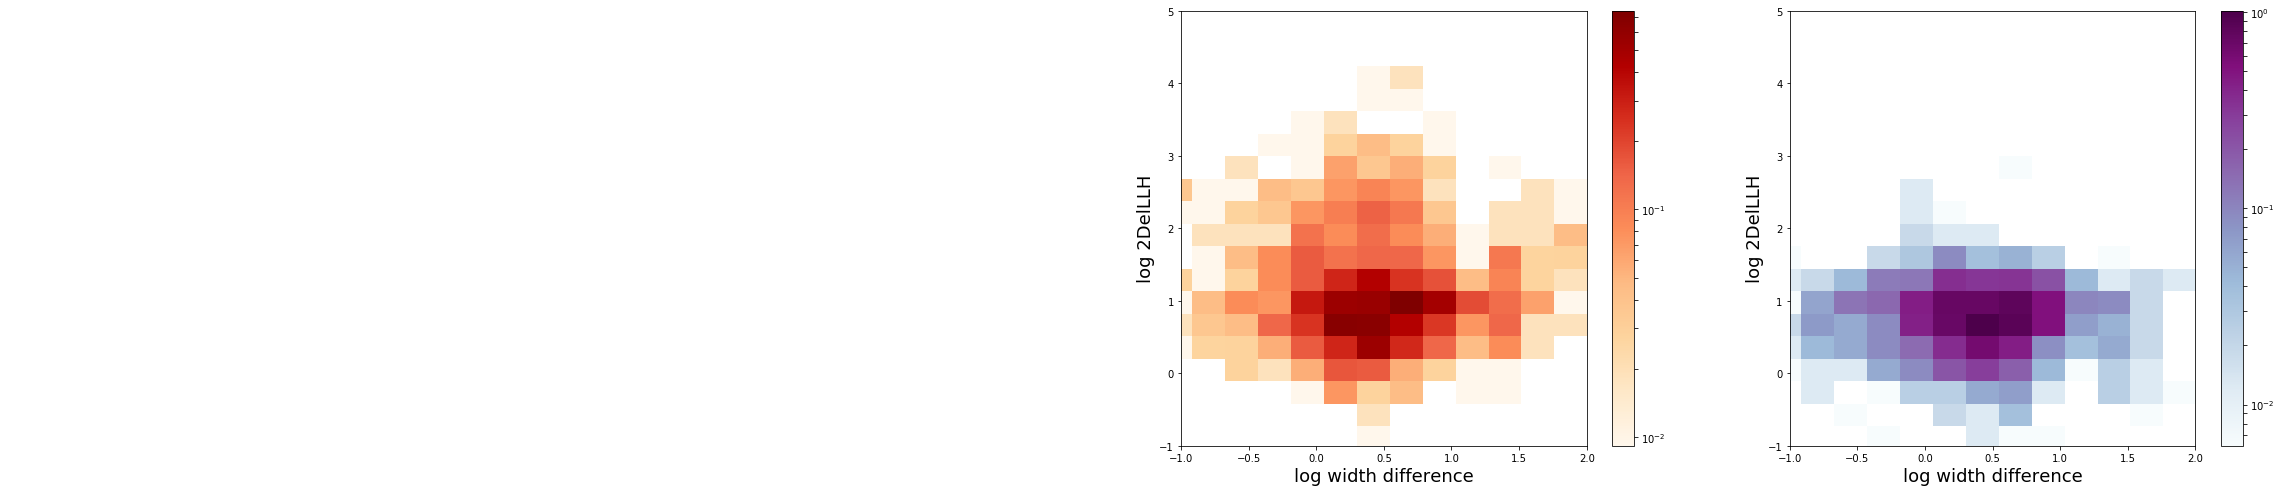

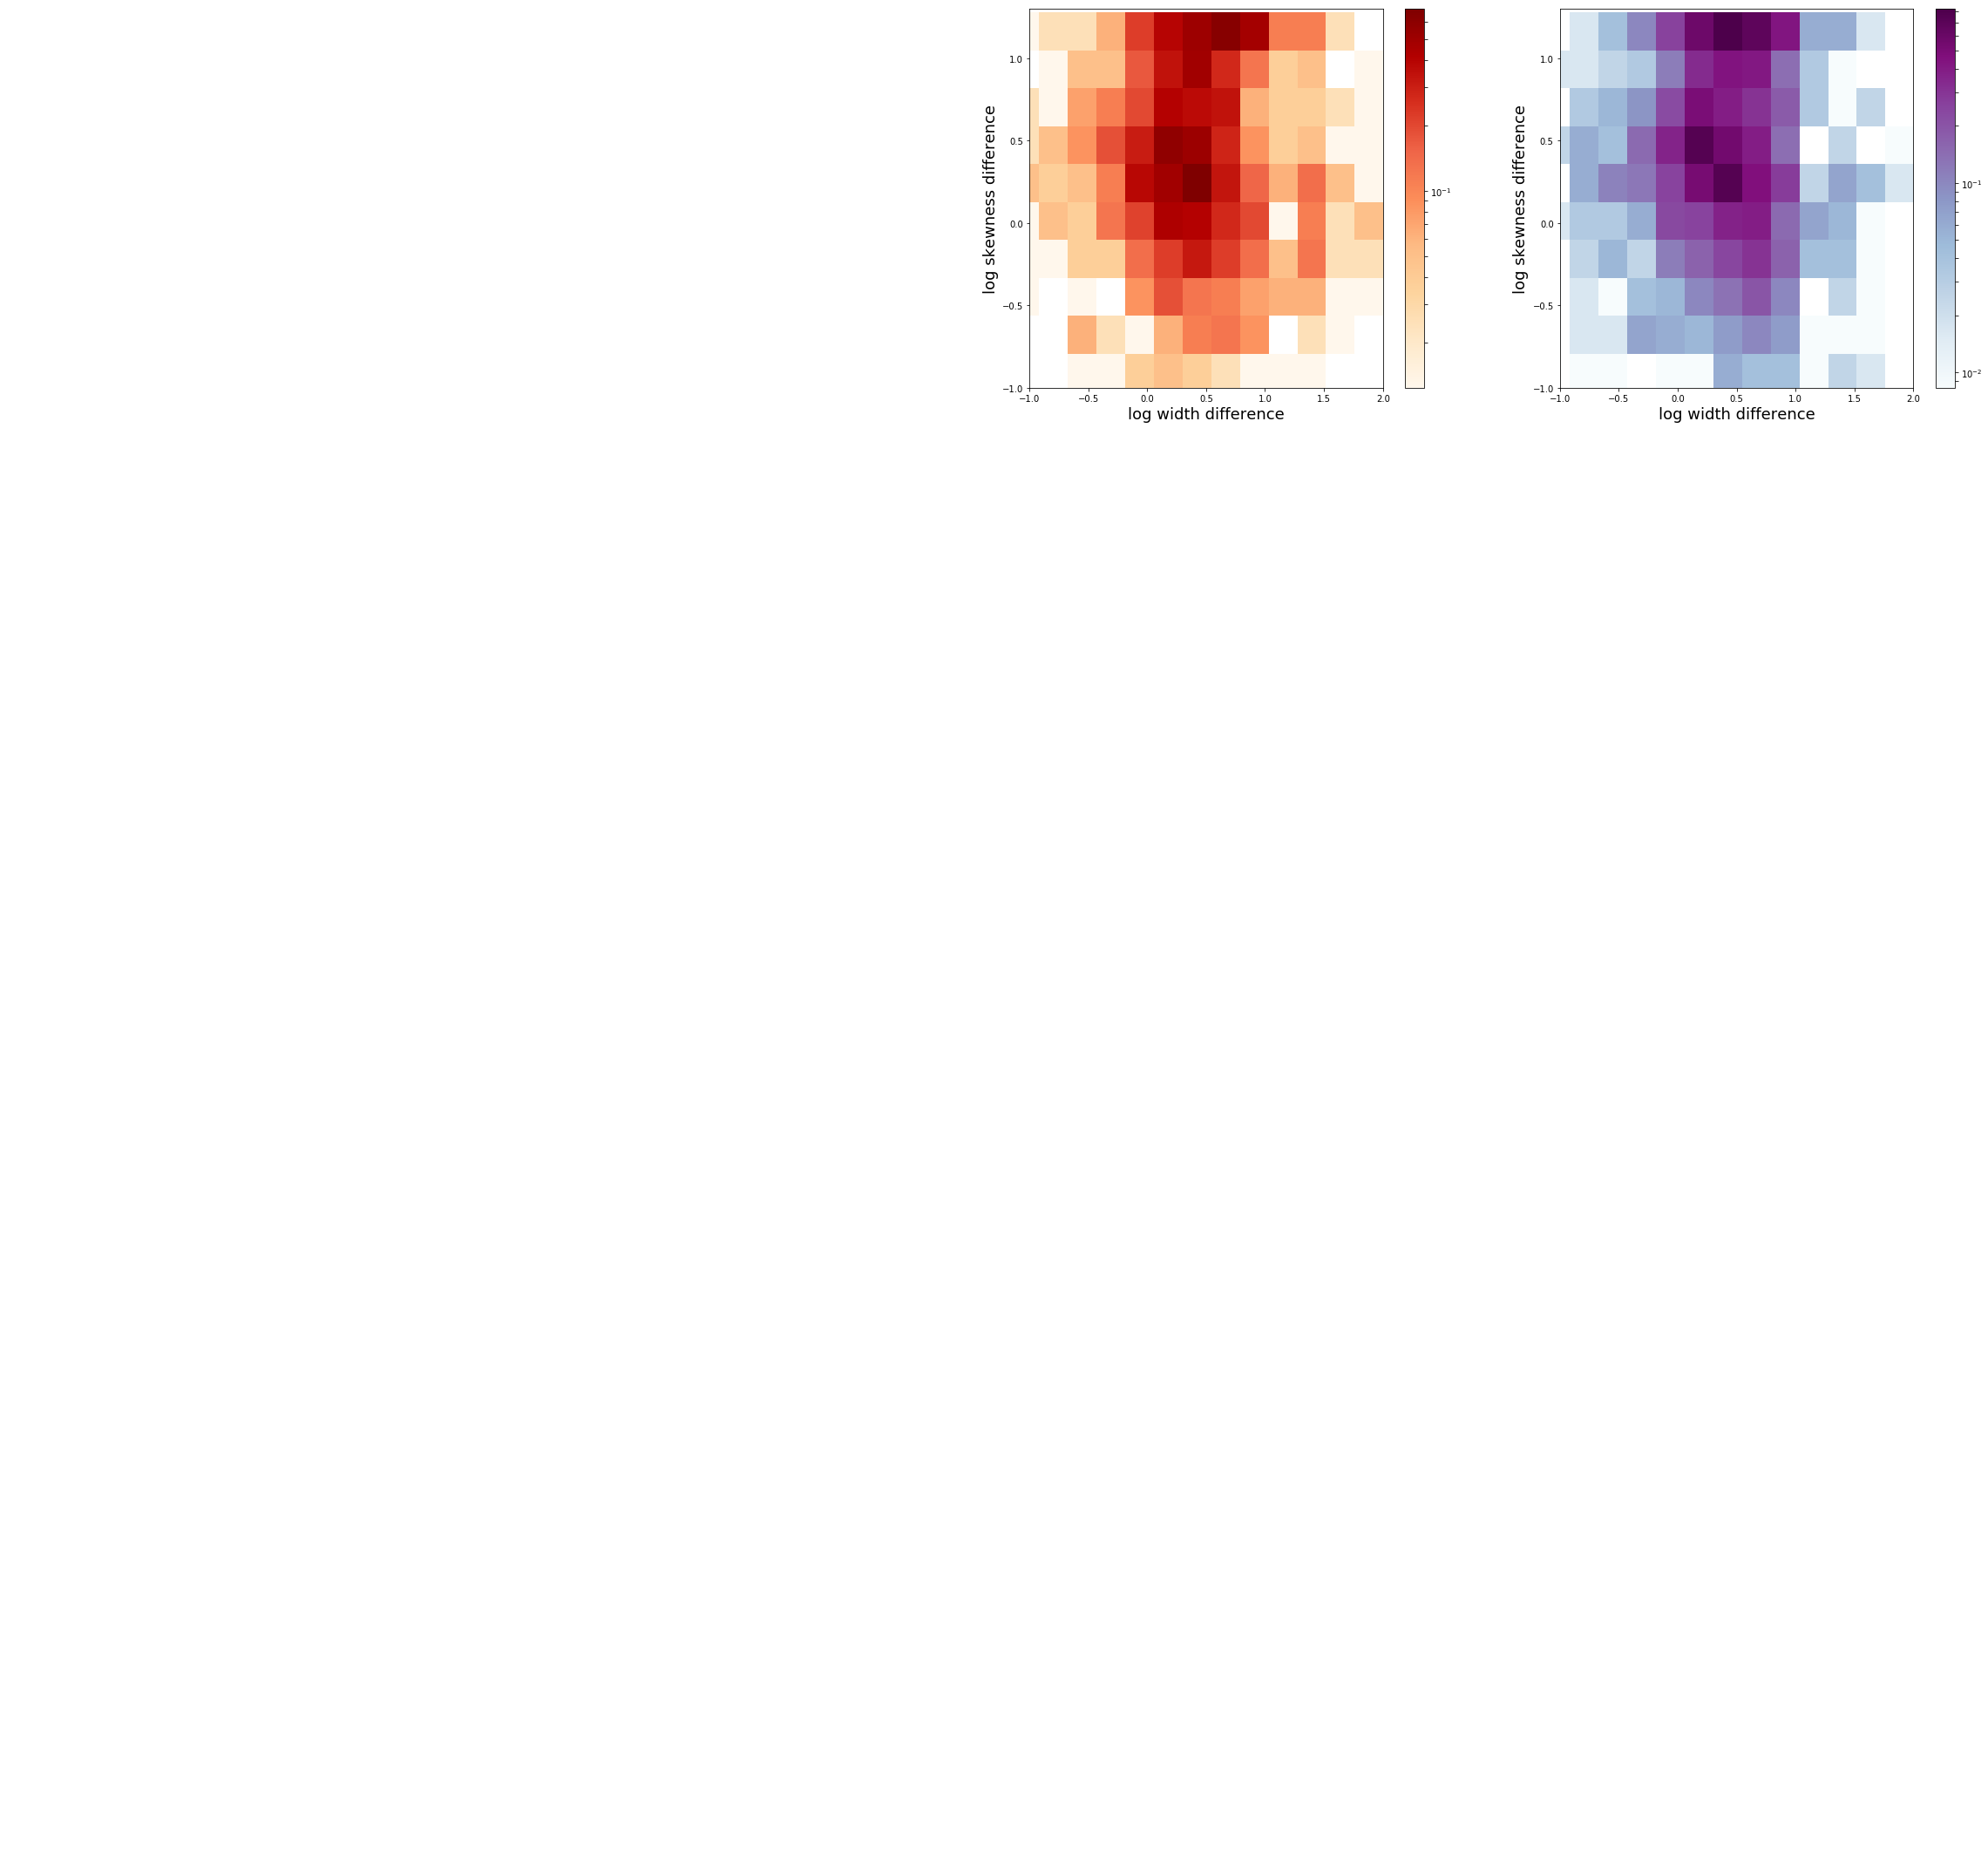

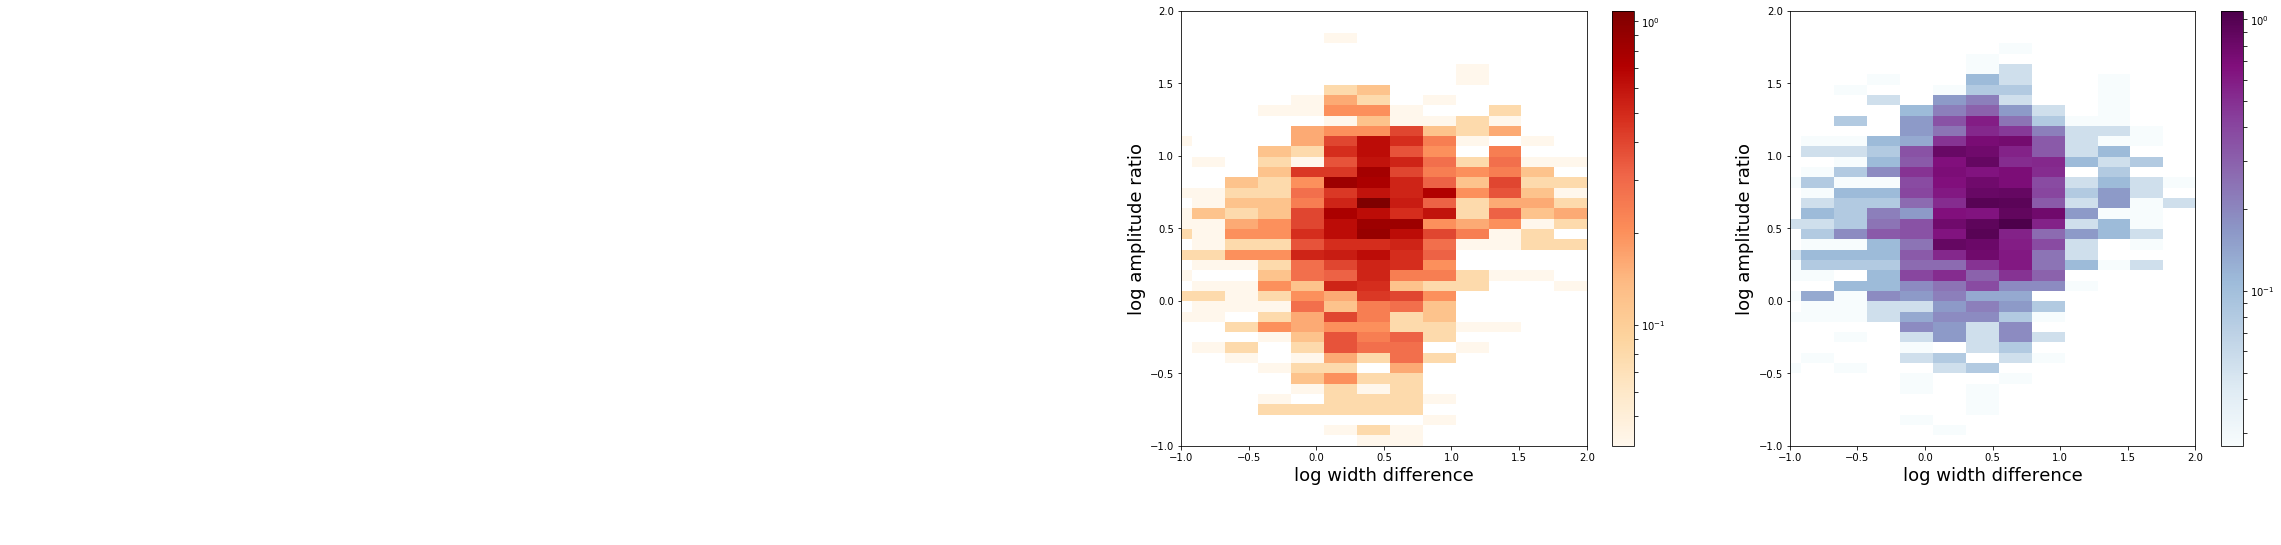

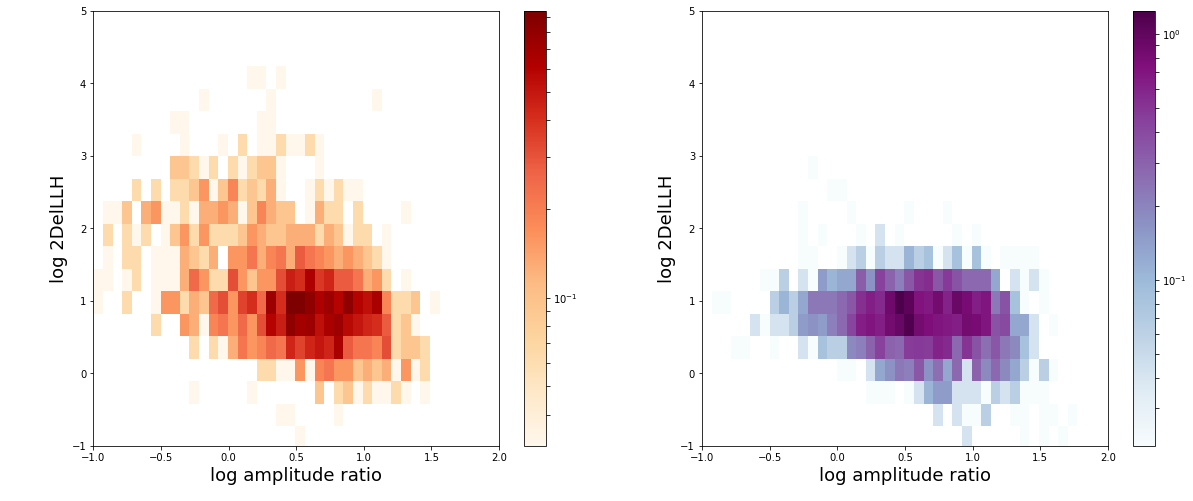

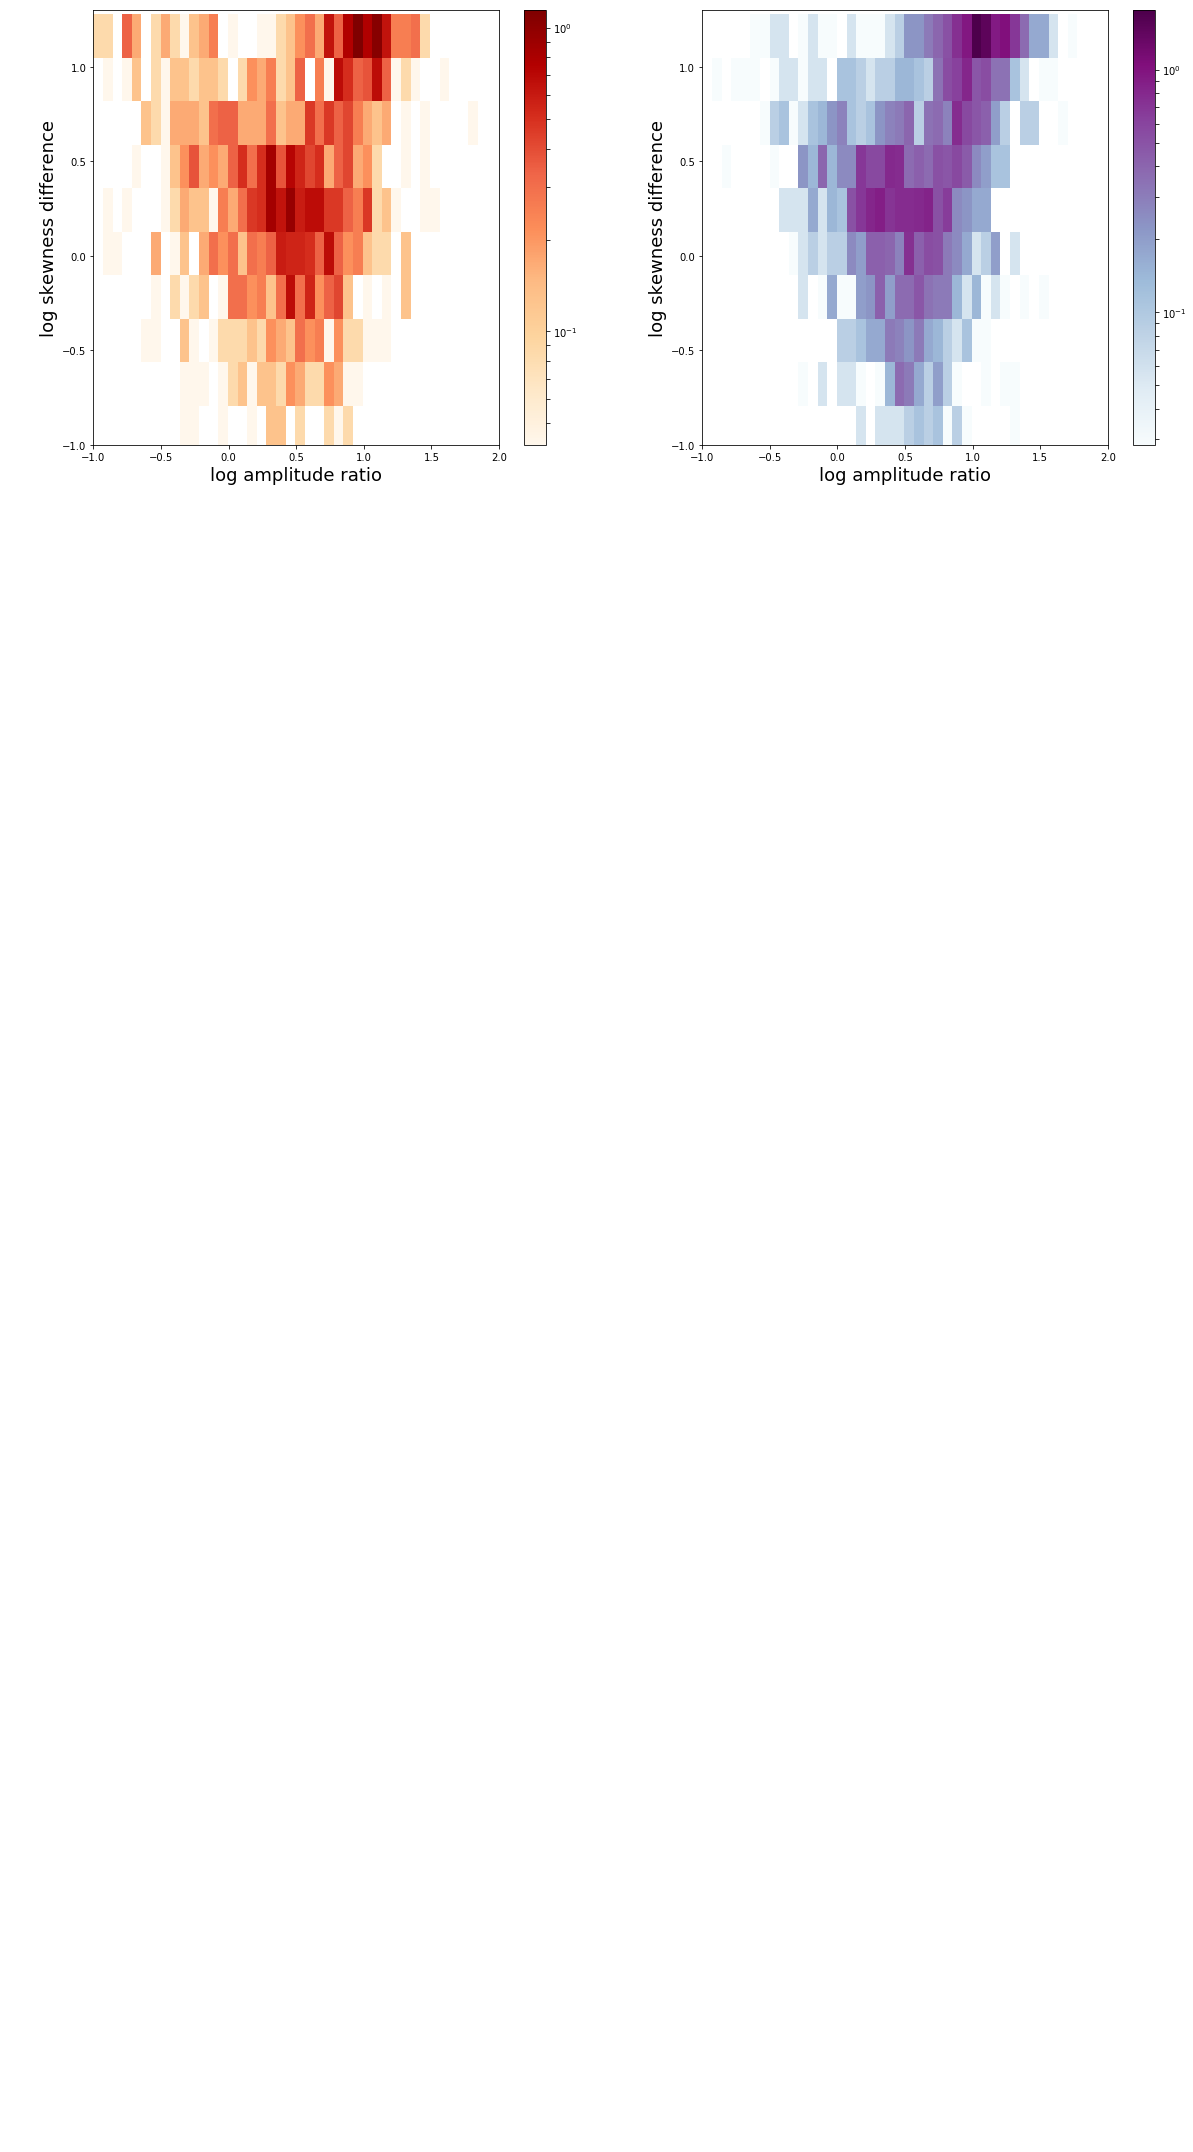

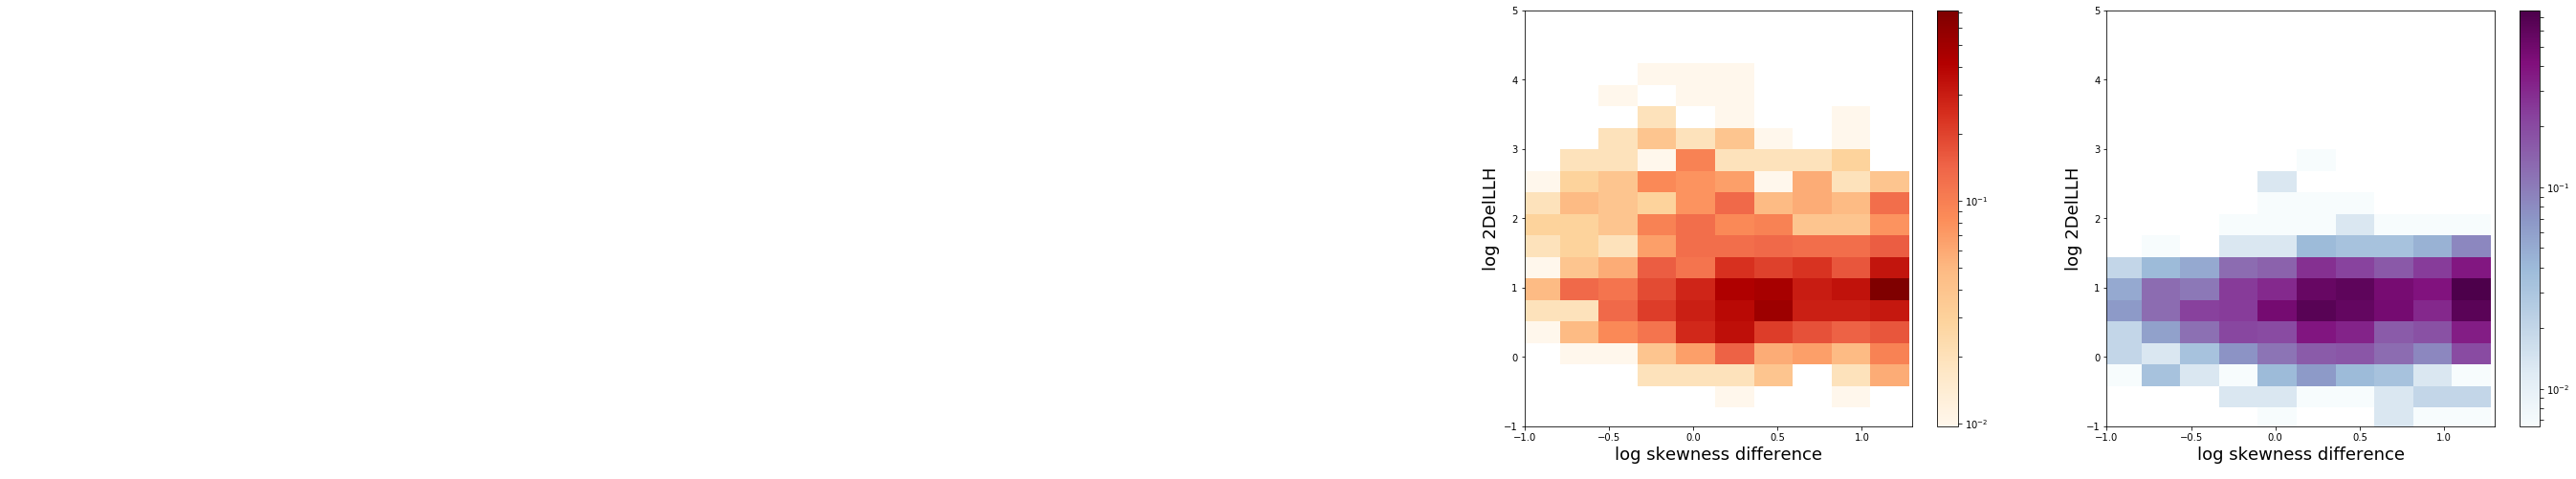

In [6]:
p.hist2d(log_all=True,
         range_time=[1e-1, 2e2], range_amp=[1e-1, 1e2], range_skew=[1e-1, 20], range_LLH=[1e-1, 1e5], range_wid=[1e-1, 1e2],
        numBins_time=20, numBins_amp=50, numBins_LLH=20, numBins_wid=50, numBins_skew=50)

In [7]:
truePositive = []
falsePositive = []
num_tau_doms = []
num_e_doms = []

eventTauLen = []
eventELen = []
for LLH_val in np.arange(0, 4.1, 0.1):
    bool_time = (timeDifferences_t > 70)
    bool_width = (widthRatio_t > 1.7)
    bool_amp = (np.log10(ampRatio_t) < 0)
    bool_LLH = (np.log10(LRR_t) > LLH_val) 
    
    tau_len = len(timeDifferences_t[bool_LLH])
    
    '''
    Removing iterated items from the list to consider the analysis on event basis rather than on dom basis.
    '''
    event_tau = list(event_number_t[bool_LLH])
    event_tau = len(list(set(event_tau)))
    tweight = list(weight_t[bool_LLH])
    tweight = list(set(tweight))

    bool_time = (timeDifferences_e > 70)
    bool_width = (widthRatio_e > 1.7)
    bool_amp = (np.log10(ampRatio_e) < 0)
    bool_LLH = (np.log10(LRR_e) > LLH_val) 
    
    e_len = len(timeDifferences_e[bool_LLH])
    
    '''
    Removing iterated items from the list to consider the analysis on event basis rather than on dom basis.
    '''
    event_e = list(event_number_e[bool_LLH])
    event_e = len(list(set(event_e)))
    eweight = list(weight_e[bool_LLH])
    eweight = list(set(eweight))
    
    '''
    Printing out certain values for check
    '''
    #print('E WEIGHT: ',len(eweight))
    #print('Tau WEIGHT: ',len(tweight))
    
    #print(len(list(weight_t[bool_LLH])))
    #print(len(list(set(tweight))))

    #print('LLH VAL: '+str(LLH_val))
    #print('Number of Tau DOMs: '+str(tau_len))
    #print(float(e_len)/(float(e_len+tau_len)))
    #print(float(tau_len)/(float(e_len+tau_len)))
    #print('NUMBER OF EVENTS TAU: ', list(set(event_tau)))
    
    '''
    Appending values to a list
    '''
    truePositive.append(sum(tweight)/(sum(tweight)+sum(eweight)))
    falsePositive.append(sum(eweight)/(sum(tweight)+sum(eweight)))
    num_tau_doms.append(tau_len)
    num_e_doms.append(e_len)
    eventTauLen.append(sum(tweight))
    eventELen.append(sum(eweight))
    

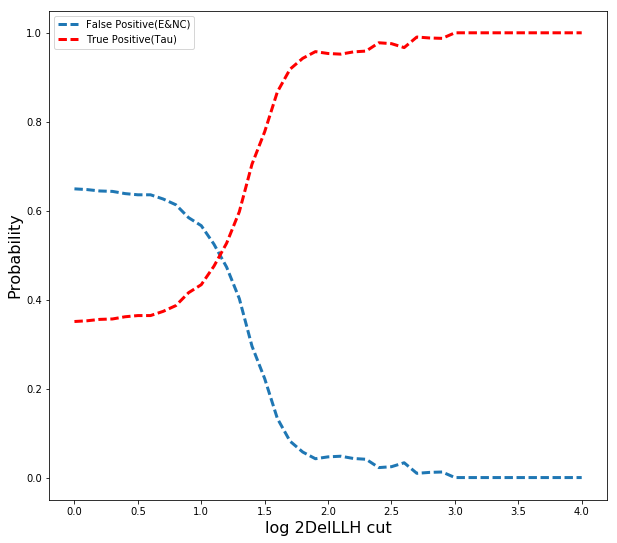

In [8]:
'''
On weighted event basis
'''
plt.figure(figsize=(10,9))
LLH_vals = np.arange(0, 4.1, 0.1)
plt.plot(LLH_vals, falsePositive, '--', label = 'False Positive(E&NC)', linewidth=3)
plt.plot(LLH_vals, truePositive, '--', c = 'r', label = 'True Positive(Tau)', linewidth=3)
plt.legend()
plt.xlabel('log 2DelLLH cut', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)

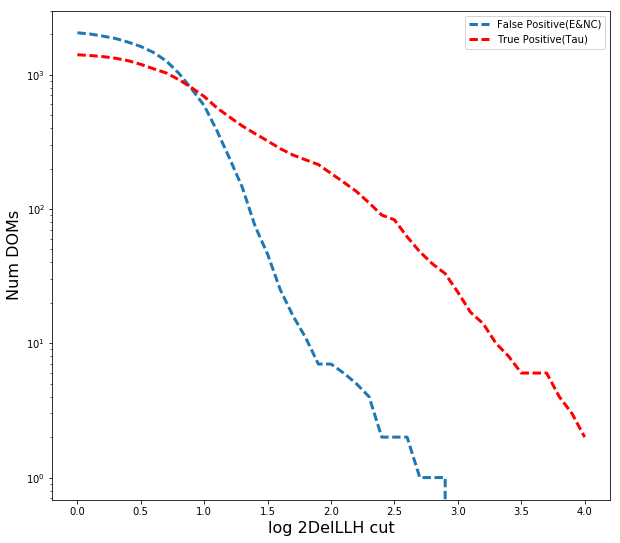

In [9]:
'''
On DOM basis
'''
plt.figure(figsize=(10,9))
LLH_vals = np.arange(0, 4.1, 0.1)
plt.plot(LLH_vals, num_e_doms, '--', label = 'False Positive(E&NC)', linewidth=3)
plt.plot(LLH_vals, num_tau_doms, '--', c = 'r', label = 'True Positive(Tau)', linewidth=3)
plt.legend()
plt.yscale('log')
plt.xlabel('log 2DelLLH cut', fontsize = 16)
plt.ylabel('Num DOMs', fontsize = 16)

'\nExpected since the events simulated start from 100 TeV? \n'

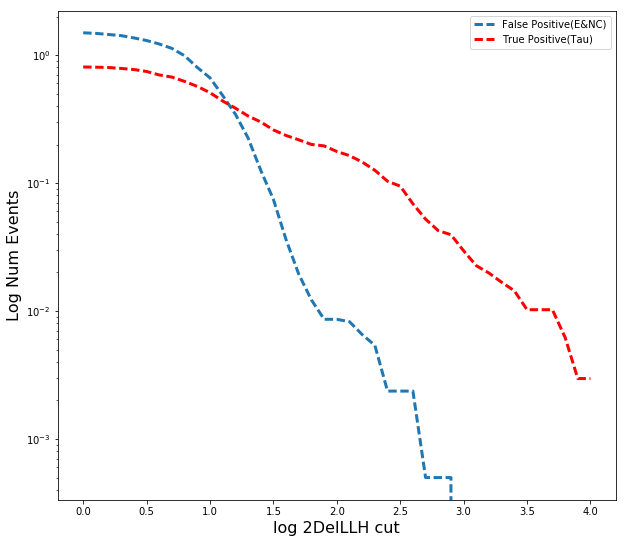

In [10]:
'''
On Event basis - events are weighted
'''
plt.figure(figsize=(10,9))
LLH_vals = np.arange(0, 4.1, 0.1)
plt.plot(LLH_vals, eventELen, '--', label = 'False Positive(E&NC)', linewidth=3)
plt.plot(LLH_vals, eventTauLen, '--', c = 'r', label = 'True Positive(Tau)', linewidth=3)
plt.legend()
plt.xlabel('log 2DelLLH cut', fontsize = 16)
plt.yscale('log')
plt.ylabel('Log Num Events', fontsize = 16)

'''
Expected since the events simulated start from 100 TeV? 
'''

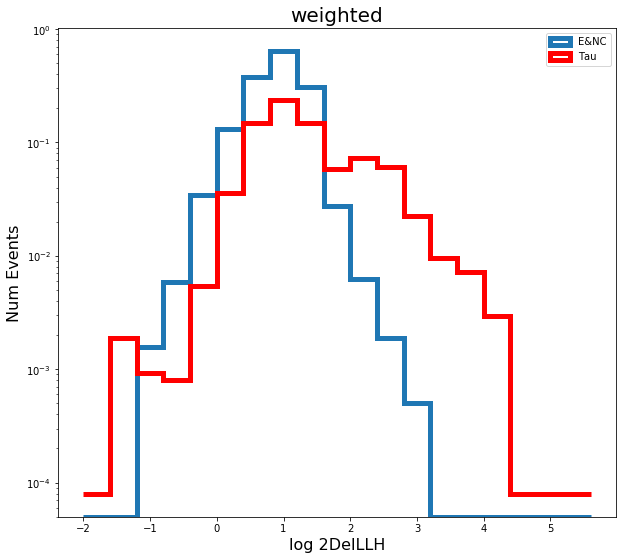

In [11]:
'''
On event basis - DOMs are weighted
'''
LLH_t = np.log10(largest_2DelLLH_t[largest_2DelLLH_t > 0])
LLH_e = np.log10(largest_2DelLLH_e[largest_2DelLLH_e > 0])

wFinal_t = weightPerEventTau[largest_2DelLLH_t > 0]
wFinal_e = weightPerEventE[largest_2DelLLH_e > 0]

bins = np.arange(-2, 6, 0.4)
plt.figure(figsize=(10,9))
plt.hist(LLH_e, bins=bins, weights=wFinal_e, histtype='step', log=True, linewidth = 5, label='E&NC')
plt.hist(LLH_t, bins=bins, weights=wFinal_t, histtype='step', log=True, linewidth = 5, label='Tau', color='r')
plt.legend()
plt.xlabel('log 2DelLLH', fontsize = 16)
plt.ylabel('Num Events', fontsize = 16)
plt.title('weighted', fontsize=20)

In [21]:
LLH_e.shape, LRR_e.shape

((1143,), (2150,))

In [1]:
from icecube import NuFlux, dataclasses
flux = NuFlux.makeFlux('honda2006')
flux.getFlux(dataclasses.I3Particle.ParticleType.NuTauBar, 10000, 1)

0.0

In [2]:
NuFlux.availableFluxes()

['CORSIKA_GaisserH3a_QGSJET-II', 'CORSIKA_GaisserH3a_SIBYLL-2.1', 'CORSIKA_GaisserH3a_average', 'IPhonda2006_sno_solmin', 'IPhonda2014_spl_solmin', 'bartol', 'honda2006', 'honda2012_spl_solmin', 'honda2014_spl_solmin', 'sarcevic_max', 'sarcevic_min', 'sarcevic_std']

In [5]:
from icecube import NuFlux, dataclasses
flux = NuFlux.makeFlux('honda2006')
flux.getFlux(dataclasses.I3Particle.ParticleType.NuMu, 3e5, 1)

1.561505966412352e-20

In [8]:
Weights.astroFlux(3e5)

9.108058805596606e-20